# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [4]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [5]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [16]:
def lat(linha):
    if linha.Latitude>0:
        return 'Norte'
    else:
        return 'Sul'

df["Hemisferio"]=df.apply(lat, axis=1)


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

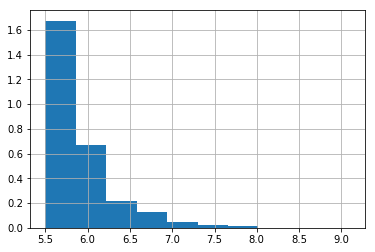

In [17]:
df.Magnitude.hist(normed=True)
plt.show()

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

##### Analisando o histograma, podemos observar que a maioria dos abalos sismicos, são de magnitude 5.5MW,  não há valores menos que 5.5MW, e conforme a magnitude vai aumentando, menor sua frequência.

In [18]:
#definindo a média, lambda e o sigma
mu=df['Magnitude'].mean()
lamb=1/mu
sigma=1/lamb
n=1000

#definindo scale
scale=mu
loc=0

#Gerar n dados:
X = expon.rvs(loc,scale,n)

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

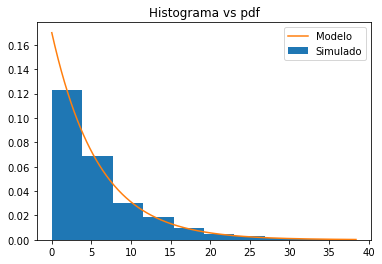

In [19]:
plt.hist(X, normed = True)
x = np.arange(X.min(),X.max(), 0.1)
plt.plot(x, expon.pdf(x, loc, scale))
plt.title('Histograma vs pdf')
plt.legend(['Modelo', 'Simulado'])

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [21]:
tabcruz=pd.crosstab(df.Hemisferio, df.Type,normalize=True)
tabcruz

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisferio,,,,
Norte,0.447121,0.000085,0.006279,0.000000
Sul,0.545191,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [22]:
prob=tabcruz["Earthquake"]["Norte"]
print(prob)

0.447121134461


#### A tabela já está normalizada, ou seja, a probabilidade é o próprio número da tabela. 

Explique o seu raciocínio

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [25]:
Norte=tabcruz.sum(axis=1)["Norte"]
#print(Norte)
probNuclear=tabcruz["Nuclear Explosion"]["Norte"]/Norte
print(probNuclear)

0.0138457191297


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

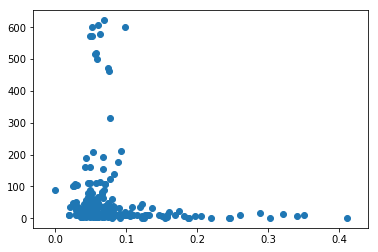

In [26]:
plt.scatter(df["Magnitude Error"],df["Depth"])
plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [27]:
correlacao= df.Depth.corr(df["Magnitude Error"])
print(correlacao)

-0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

#### O valor da correlação é muito pequeno, ou seja, a correlação entre o Depth e o Magnitude Error é pequena.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64


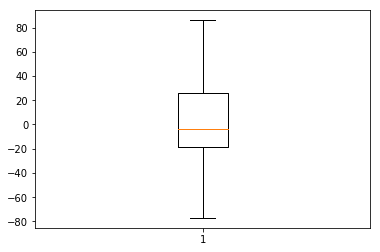

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


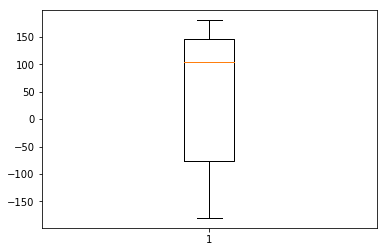

In [28]:
plt.boxplot(df.Latitude)
print(df.Latitude.describe())
plt.show()

plt.boxplot(df.Longitude)
print(df.Longitude.describe())
plt.show()

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [29]:
prob=pd.crosstab(df.Hemisferio,[df["Magnitude Type"]=="MB",df["Type"]=="Nuclear Explosion"], normalize=True)
print("É mais provável no norte.") if prob[1][1]["Norte"] > prob[1][1]["Sul"] else print("É mais provável no sul.")

É mais provável no norte.
